<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/SNR__Rec_Fundos_RM351578_RM351070_RMRM350640_RM352054.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Trabalho integrado de SNR 8DTS

1.   RM351578 - RODRIGO DE FEO VIEIRA
2.   RM351070 - DANILO DOS SANTOS DA FONTE
3.   RM350640 - FELIPE FIORIM CARVALHO SILVA
4.   RM352054 - GABRIEL GONSALVES DE ALMEIDA

In [1]:
!pip install pandas openpyxl


In [41]:
#Lendo a base de clientes
# Fazer o upload do arquivo Excel
from google.colab import files
uploaded = files.upload()

# Ler o arquivo Excel
import pandas as pd

file_name = list(uploaded.keys())[0]

# Ler o arquivo Excel
df_cliente = pd.read_excel(file_name)

# Mostrar as primeiras linhas do DataFrame
print(df_cliente.head())

Saving BaseClientes.xlsx to BaseClientes (3).xlsx
           Nome  Aporte  Tempo  \
0   Maria Silva  567892      2   
1    João Souza  234567      1   
2  Ana Oliveira  789123      3   
3  Pedro Santos  456789      2   
4   Carlos Lima  123456      1   

                                            Objetivo  Idade  Perfil  
0  Diversificar a carteira com ações de diferente...     42       2  
1     Investir em títulos do governo para segurança.     23       1  
2                     Economizar para aposentadoria.     65       3  
3                      Comprar imóveis para aluguel.     30       2  
4                  Investir em startups promissoras.     57       1  


In [42]:
#Lendo a base de fundos
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Ler o arquivo Excel
df_fundos = pd.read_excel(file_name)

# Mostrar as primeiras linhas do DataFrame
print(df_fundos.head())

Saving BaseFundos.xlsx to BaseFundos (1).xlsx
                            NOME        Perfil  Perc  CodPerfil
0     QUANTUM FUNDO CONSERVADOR I  CONSERVADOR    12          1
1           QUANTUM FUNDO TESOURO  CONSERVADOR     8          1
2           QUANTUM FUNDO CDB CDI  CONSERVADOR    15          1
3  QUANTUM FUNDO PREVIDENCIA PGBL  CONSERVADOR     9          1
4  QUANTUM FUNDO PREVIDENCIA VGBL  CONSERVADOR    10          1


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#Vamos montar o modelo para classificar o cliente
# Remover a coluna 'Nome' e 'Objetivo' pois não é útil para o modelo
data = df_cliente.drop('Nome', axis=1)
data = data.drop('Objetivo', axis=1)

# Separar as features e o alvo
X = data.drop('Perfil', axis=1)
y = data['Perfil']

In [47]:
print(X)
print('------')
print(y)

    Aporte  Tempo  Idade
0   567892      2     42
1   234567      1     23
2   789123      3     65
3   456789      2     30
4   123456      1     57
5   890123      3     19
6   345678      1     50
7   901234      3     72
8   678901      2     34
9   234567      1     61
10  789123      3     27
11  456789      2     48
12  123456      1     20
13  890123      3     55
14  345678      1     38
15  901234      2     70
16  678901      3     25
17  234567      2     59
18  789123      1     22
19  456789      3     68
20  123456      1     31
21  890123      2     63
22  345678      3     28
23  901234      2     53
24  678901      1     36
25  234567      3     67
26  789123      1     24
27  456789      2     58
28  123456      3     21
29  890123      2     64
30  345678      1     29
31  901234      3     51
32  678901      1     73
33  234567      2     26
34  789123      3     60
35  456789      2     33
36  123456      1     69
37  890123      3     32
38  345678      1     74


In [165]:
#Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
#Treinar o modelo KNN
# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

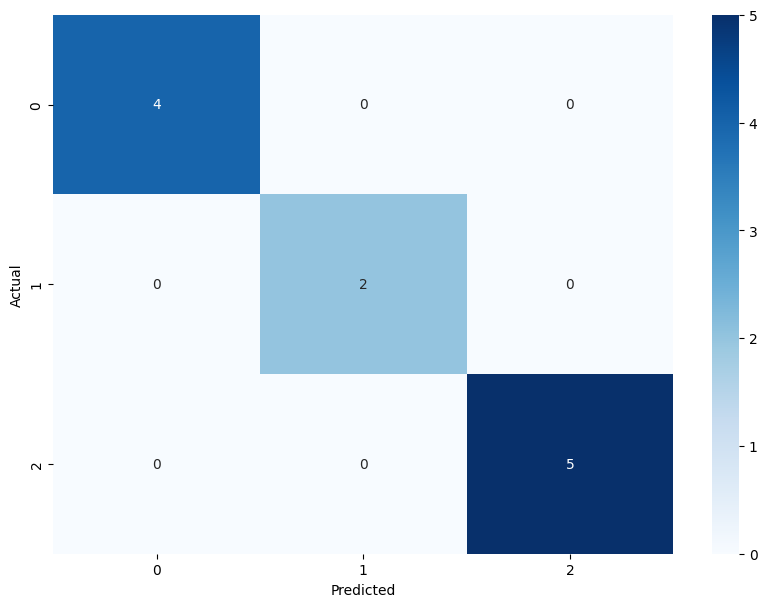

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [171]:
#Vamos avalair o modelo
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Relatório de classificação
print(classification_report(y_test, y_pred))

In [15]:
#Agora vamos criar uma interface para informar os dados do cliente e prever o perfil
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


In [168]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import ipywidgets as widgets
from IPython.display import display
import joblib

In [172]:
# Widgets para entrada de dados do cliente
nome = widgets.Text(description="Nome:")
aporte = widgets.FloatText(description="Aporte:")
tempo = widgets.Dropdown(options=["Curto", "Médio", "Longo"], description="Tempo:")
idade = widgets.IntText(description="Idade:")
botao = widgets.Button(description="Classificar")
objetivo = widgets.Text(description="Objetivo:")
perfil_predito = ''

# Display dos widgets
display(nome, aporte, tempo, idade, objetivo, botao)

# Função para classificar o cliente
def classificar_cliente(b):
    tempo_dict = {"Curto": 1, "Médio": 2, "Longo": 3}

    dados_cliente = pd.DataFrame({
        'Valor do Aporte': [aporte.value],
        'Tempo': [tempo_dict[tempo.value]],
        'Idade': [idade.value]
    })

    print(dados_cliente)

    perfil_pred = knn.predict(dados_cliente)

    perfil_dict = {1: "CONSERVADOR", 2: "MODERADO", 3: "ARROJADO"}
    perfil_str = perfil_dict[perfil_pred[0]]

    global perfil_predito
    perfil_predito = perfil_str
    global nome_cliente
    nome_cliente = nome.value
    global aporte_cliente
    aporte_cliente = aporte.value
    global objetivo_cliente
    objetivo_cliente = objetivo.value

    print(f"O perfil do cliente {nome.value} é: {perfil_str}")


# Associar a função ao botão
botao.on_click(classificar_cliente)


Text(value='', description='Nome:')

FloatText(value=0.0, description='Aporte:')

Dropdown(description='Tempo:', options=('Curto', 'Médio', 'Longo'), value='Curto')

IntText(value=0, description='Idade:')

Text(value='', description='Objetivo:')

Button(description='Classificar', style=ButtonStyle())

   Valor do Aporte  Tempo  Idade
0            233.0      3     23
O perfil do cliente r3wrwe é: MODERADO


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


   Valor do Aporte  Tempo  Idade
0     1.000000e+09      3     23
O perfil do cliente r3wrwe é: MODERADO


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


   Valor do Aporte  Tempo  Idade
0     1.000000e+09      3     38
O perfil do cliente Rodrigo de Feo é: MODERADO


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [177]:
#Agora vamos sugerir o aporte nos fundos do perfil
df = pd.DataFrame(df_fundos)

# Filtrar os fundos correspondentes ao perfil predito
fundos_perfil = df_fundos[df_fundos['Perfil'] == perfil_predito]

fundos_perfil['Valor do Aporte'] = fundos_perfil['Perc'] * aporte_cliente / 100

fundos_perfil



<ipython-input-177-80a87124619d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fundos_perfil['Valor do Aporte'] = fundos_perfil['Perc'] * aporte_cliente / 100


,NOME,Perfil,Perc,CodPerfil,Valor do Aporte
10,QUANTUM FUNDO DE INVESTIMENTO EM ACOES,MODERADO,10,2,100000000.0
11,QUANTUM FUNDO MULTIMERCADO,MODERADO,12,2,120000000.0
12,QUANTUM FUNDO DE ACOES NO EXTERIOR,MODERADO,8,2,80000000.0
13,QUANTUM FUNDO ETF,MODERADO,15,2,150000000.0
14,QUANTUM CARTEIRA DE CREDITO,MODERADO,9,2,90000000.0
15,QUANTUM FUNDOS ETF OFFSHORE,MODERADO,11,2,110000000.0
16,QUANTUM FUNDO DIVIDENDOS,MODERADO,7,2,70000000.0
17,QUANTUM FUNDO ACOES EUROPA,MODERADO,13,2,130000000.0
18,QUANTUM FUNDO CDB MODERADO,MODERADO,14,2,140000000.0
19,QUANTUM FUNDO IMOBILIARIO MOD,MODERADO,1,2,10000000.0


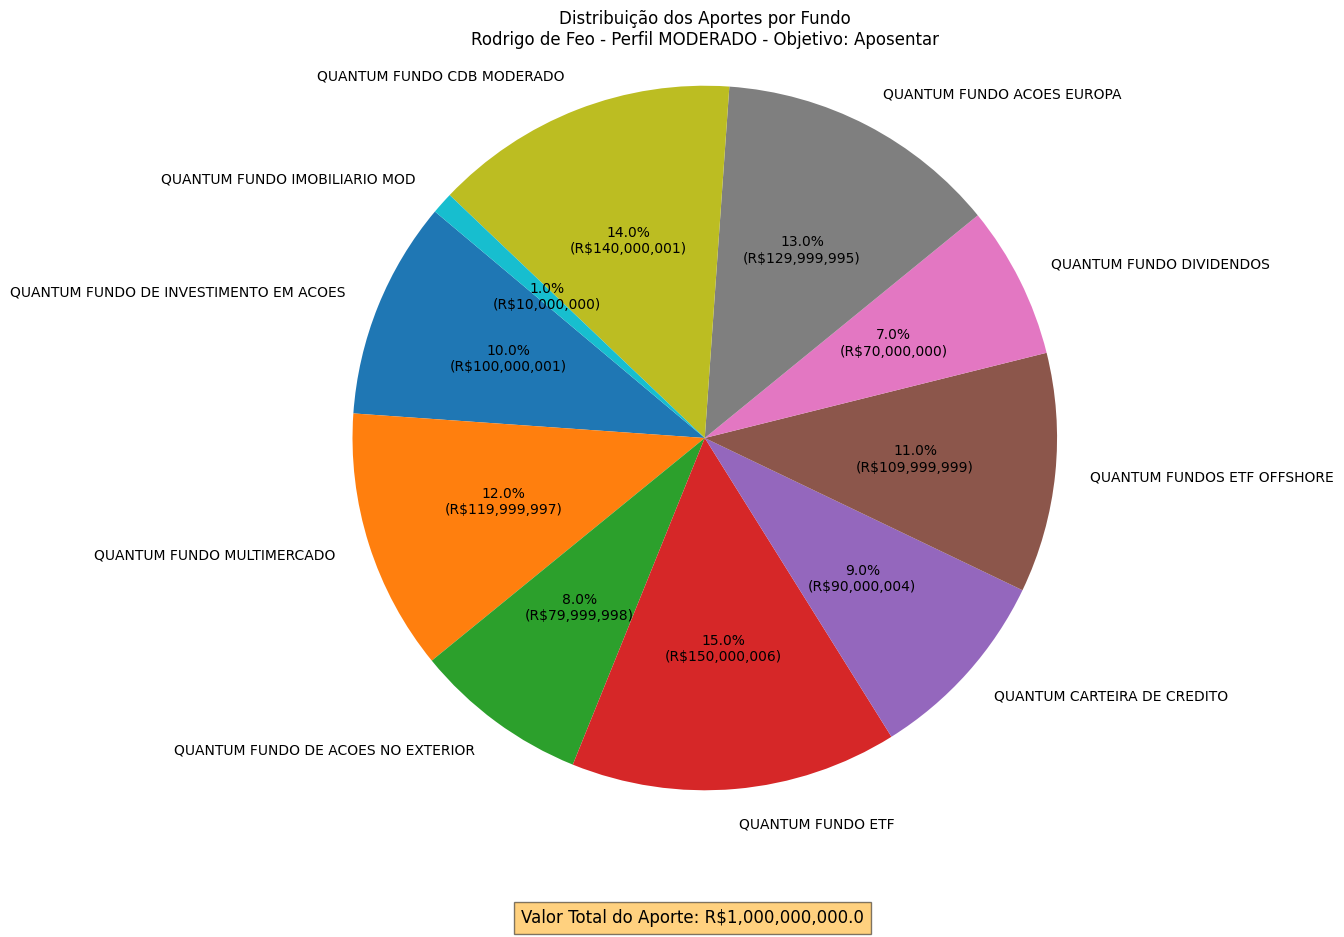

In [178]:
import matplotlib.pyplot as plt

# Função personalizada para formatar o texto dentro do gráfico de pizza
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f"{pct:.1f}%\nR${absolute:,}"

# Criando o gráfico de pizza
plt.figure(figsize=(10, 10))

plt.pie(fundos_perfil['Valor do Aporte'], labels=fundos_perfil['NOME '], autopct=lambda pct: f"{pct:.1f}%\n(R${(pct/100)*fundos_perfil['Valor do Aporte'].sum():,.0f})",
        startangle=140)

plt.title(f'Distribuição dos Aportes por Fundo\n{nome_cliente} - Perfil {perfil_predito} - Objetivo: {objetivo_cliente}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adicionando o valor total do aporte no rodapé
plt.figtext(0.5, 0.01, f"Valor Total do Aporte: R${aporte_cliente:,}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Exibindo o gráfico
plt.show()
